# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Khoirizqi Velarati
- **Email:** kvelarati@gmail.com
- **ID Dicoding:** velarati

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak & paling sedikit diminati oleh customers?
- Apa tipe pembayaran yang sering digunakan oleh customers?
- Bagaimana perbandingan jumlah pesanan antara berbagai status-order? Apakah ada status-order yang memiliki jumlah pesanan yang lebih dominan daripada yang lain? Jika ada, bagaimana perbandingan persentase dari pesanan dengan status yang lebih dominan dibandingkan dengan total pesanan yang memiliki status lainnya?
- Apa saja kota dengan jumlah order berstatus "delivered" terbanyak?


## Import Semua Packages/Library yang Digunakan

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1. Data Wrangling

###1.1 Gathering Data

In [168]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [169]:
#Directory
from google.colab import drive
data_dir = "/content/drive/MyDrive/data/"

####1.1.1 Load Tabel



In [170]:
#Load tabel customers
customers = pd.read_csv(data_dir + 'customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [171]:
#Load tabel orders
orders = pd.read_csv(data_dir + 'orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [172]:
#Load tabel order items
order_items = pd.read_csv(data_dir + 'order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [173]:
#Load tabel order payments
order_payments = pd.read_csv(data_dir + 'order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [174]:
#Load tabel order reviews
order_reviews = pd.read_csv(data_dir + 'order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [175]:
#Load tabel products
products = pd.read_csv(data_dir + 'products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [176]:
#Load tabel product category
product_category = pd.read_csv(data_dir + 'product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [177]:
#Load tabel sellers
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [178]:
#Menggabungkan tabel customers & orders
customers_orders = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [179]:
#Menggabungkan tabel order items, seller, order payments, & order reviews
order_proses = pd.merge(
    #Menggabungkan tabel order items & seller
    pd.merge(
        order_items,
        sellers,
        how="left",
        on="seller_id"
    ),
    #Menggabungkan tabel order payments, & order reviews
    pd.merge(
        order_payments,
        order_reviews,
        how="left",
        on="order_id"
    ),
    how="left",
    on="order_id"
)
order_proses.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


In [180]:
#Menggabungkan tabel order proses, products & product category
order_proses_product_category = pd.merge(
    order_proses,
    #Menggabungkan tabel roducts & product category
    pd.merge(
        products,
        product_category,
        how="left",
        on="product_category_name"
    ),
    how="left",
    on="product_id"
)
order_proses_product_category.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,...,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,...,2017-05-15 11:34:13,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,...,2018-01-23 16:06:31,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,...,2018-08-15 16:39:01,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,...,2017-03-03 10:54:59,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


###1.2 Assessing Data

####1.2.1 Menilai Data Customers Orders

In [181]:
customers_orders.info()
print("\nJumlah Duplikasi: ", customers_orders.duplicated().sum())
customers_orders.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 11.9+ MB

Jumlah Dupli

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441.000000,99441,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,96096,NaN,4119,27,99441,8,98875,90733,81018,95664,459
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2018-08-02 12:06:09,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-02-14 21:09:19,2017-12-20 00:00:00
freq,1,17,NaN,15540,41746,1,96478,3,9,47,3,522
mean,NaN,NaN,35137.474583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>* Terlihat adanya tanda-tanda missing value
* Tedapat kolom yang tidak diperlukan:
  * customer_zip_code_prefix
  * index ke 7-11





In [182]:
customers_orders.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64



> * Terdapat 3 kolom yang mengandung missing value. Ketiga kolom tersebut akan dihapus karena tidak dibutuhkan



####1.2.2 Menilai Data Order Proses Product Category

In [183]:
order_proses_product_category.info()
print("\nJumlah Duplikasi: ", order_proses_product_category.duplicated().sum())
order_proses_product_category.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118310 non-null  object 
 1   order_item_id                  118310 non-null  int64  
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   seller_zip_code_prefix         118310 non-null  int64  
 8   seller_city                    118310 non-null  object 
 9   seller_state                   118310 non-null  object 
 10  payment_sequential             118307 non-null  float64
 11  payment_type                   118307 non-null  object 
 12  payment_installments          

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,118310,118310.000000,118310,118310,118310,118310.000000,118310.000000,118310.000000,118310,118310,...,117329,116601,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,116576
unique,98666,NaN,32951,3095,93318,NaN,NaN,NaN,611,23,...,97546,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,sao paulo,SP,...,2017-08-17 22:17:55,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,63,NaN,536,2155,63,NaN,NaN,NaN,29293,84377,...,63,11988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11988
mean,NaN,1.196543,NaN,NaN,NaN,120.646603,20.032387,24442.410413,NaN,NaN,...,NaN,NaN,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,NaN
std,NaN,0.699489,NaN,NaN,NaN,184.109691,15.836850,27573.004511,NaN,NaN,...,NaN,NaN,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,1001.000000,NaN,NaN,...,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,6429.000000,NaN,NaN,...,NaN,NaN,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.900000,16.280000,13660.000000,NaN,NaN,...,NaN,NaN,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,27972.000000,NaN,NaN,...,NaN,NaN,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN


>* Terlihat adanya tanda-tanda missing value
* Tedapat kolom yang tidak diperlukan:
  * index ke 3-10
  * index ke 12-19
  * index ke 21-28


In [184]:
order_proses_product_category.isna().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
seller_zip_code_prefix                0
seller_city                           0
seller_state                          0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           981
review_score                        981
review_comment_title             104418
review_comment_message            68631
review_creation_date                981
review_answer_timestamp             981
product_category_name              1709
product_name_lenght                1709
product_description_lenght         1709
product_photos_qty                 1709
product_weight_g                     20


>* Missing value yang harus diperhatikan yaitu pada kolom:
  * payment_type
  * review_score
  * product_category_name

### 1.3 Cleaning Data

#### 1.3.1 Cleaning Data Customers Orders

In [185]:
#Menghapus kolom yang tidak diperlukan
customers_orders = customers_orders.drop(customers_orders.columns[2], axis=1).drop(customers_orders.iloc[:, 7:12], axis=1)
customers_orders.info()
print("Jumlah baris & kolom: ", customers_orders.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
 4   order_id            99441 non-null  object
 5   order_status        99441 non-null  object
dtypes: object(6)
memory usage: 7.3+ MB
Jumlah baris & kolom:  (99441, 6)


####1.3.2 Cleaning Data Order Proses Product Category

In [186]:
#Menghapus kolom yang tidak diperlukan
order_proses_product_category = order_proses_product_category.drop(order_proses_product_category.columns[3:11], axis=1).drop(order_proses_product_category.iloc[:, 12:20], axis=1).drop(order_proses_product_category.iloc[:, 21:29], axis=1)
order_proses_product_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 118309
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   order_id               118310 non-null  object
 1   order_item_id          118310 non-null  int64 
 2   product_id             118310 non-null  object
 3   payment_type           118307 non-null  object
 4   product_category_name  116601 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.4+ MB


In [188]:
#Mengisi missing value pada kolom payment_type dengan "other_type"
order_proses_product_category["payment_type"].fillna("other_type", inplace=True)

#Mengisi missing value pada kolom product_category_name dengan "other_product"
order_proses_product_category["product_category_name"].fillna("other_product", inplace=True)

order_proses_product_category.isna().sum()
print("Jumlah baris & kolom: ", order_proses_product_category.shape)

Jumlah baris & kolom:  (118310, 5)


Kedua tabel di atas telah bersih dan kemudian dilakukan penggabungan menjadi satu data baru

In [189]:
#Menggabungkan seluruh tabel
all_data = pd.merge(
    customers_orders,
    order_proses_product_category,
    how="left",
    on="order_id",
)
all_data.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_item_id,product_id,payment_type,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,1.0,a9516a079e37a9c9c36b9b78b10169e8,credit_card,moveis_escritorio
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,1.0,4aa6014eceb682077f9dc4bffebc05b0,credit_card,utilidades_domesticas
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,1.0,bd07b66896d6f1494f5b86251848ced7,credit_card,moveis_escritorio
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,1.0,a5647c44af977b148e0a3a4751a09e2e,credit_card,moveis_escritorio
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,1.0,9391a573abe00141c56e38d84d7d5b3b,credit_card,casa_conforto


In [190]:
#Memastikan kebersihan tabel all_data setelah proses penggabungan
all_data.info()
print("\nJumlah missing value:\n", all_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119085 entries, 0 to 119084
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            119085 non-null  object 
 1   customer_unique_id     119085 non-null  object 
 2   customer_city          119085 non-null  object 
 3   customer_state         119085 non-null  object 
 4   order_id               119085 non-null  object 
 5   order_status           119085 non-null  object 
 6   order_item_id          118310 non-null  float64
 7   product_id             118310 non-null  object 
 8   payment_type           118310 non-null  object 
 9   product_category_name  118310 non-null  object 
dtypes: float64(1), object(9)
memory usage: 10.0+ MB

Jumlah missing value:
 customer_id                0
customer_unique_id         0
customer_city              0
customer_state             0
order_id                   0
order_status               0
or

> Terdapat missing value pada banyak data terkait order dengan jumlah yang sama yaitu 775. Hal tersebut bisa jadi terjadi karena berkaitan dengan status order

In [191]:
#Menghapus nilai yang memiliki missing value
all_data.dropna(inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118310 entries, 0 to 119084
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customer_id            118310 non-null  object 
 1   customer_unique_id     118310 non-null  object 
 2   customer_city          118310 non-null  object 
 3   customer_state         118310 non-null  object 
 4   order_id               118310 non-null  object 
 5   order_status           118310 non-null  object 
 6   order_item_id          118310 non-null  float64
 7   product_id             118310 non-null  object 
 8   payment_type           118310 non-null  object 
 9   product_category_name  118310 non-null  object 
dtypes: float64(1), object(9)
memory usage: 9.9+ MB


## 2. Exploratory Data Analysis (EDA)

In [192]:
#Explore data all_data
all_data.describe(include="all")

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_item_id,product_id,payment_type,product_category_name
count,118310,118310,118310,118310,118310,118310,118310.000000,118310,118310,118310
unique,98666,95420,4110,27,98666,7,NaN,32951,5,74
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,credit_card,cama_mesa_banho
freq,63,75,18727,49865,63,115723,NaN,536,87258,11988
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.196543,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.699489,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN


In [193]:
#Mengetahui 10 produk paling banyak diminati
all_data["product_category_name"].value_counts().head(10)

cama_mesa_banho           11988
beleza_saude              10032
esporte_lazer              9004
moveis_decoracao           8832
informatica_acessorios     8150
utilidades_domesticas      7380
relogios_presentes         6213
telefonia                  4726
ferramentas_jardim         4590
automotivo                 4400
Name: product_category_name, dtype: int64

>Dapat dilihat bahwa produk yang paling banyak diminati adalah cama_mesa_banho dengan jumlah order mencapai 11988

In [194]:
#Melihat 10 produk yang paling sedikit diminati
all_data["product_category_name"].value_counts().tail(10)

flores                                           33
fashion_esporte                                  31
casa_conforto_2                                  31
artes_e_artesanato                               24
la_cuisine                                       16
portateis_cozinha_e_preparadores_de_alimentos    15
cds_dvds_musicais                                14
pc_gamer                                         10
fashion_roupa_infanto_juvenil                     8
seguros_e_servicos                                2
Name: product_category_name, dtype: int64

> Dapat dilihat bahwa produk yang paling sedikit diminati adalah seguros_e_servicos dengan jumlah order hanya 2

In [195]:
#Melihat persebaran jumlah customers berdasarkan customer_city
all_data.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15402
rio de janeiro     6834
belo horizonte     2750
brasilia           2116
curitiba           1510
                  ...  
ibarama               1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4110, dtype: int64

>Terlihat bahwa persebaran customer kurang merata di setiap kota. Customer terbanyak berada di kota Sao Paulo dengan jumlah 15540 customers.

In [196]:
#Mengetahui tipe pembayaran yang digunakan
all_data["payment_type"].value_counts()

credit_card    87258
boleto         23018
voucher         6332
debit_card      1699
other_type         3
Name: payment_type, dtype: int64

> Terlihat bahwa tipe pembayaran dengan credit card paling sering digunakan yaitu 87258 kali

In [197]:
#Mengetahui perbandingan jumlah pesanan antara berbagai status order
all_data["order_status"].value_counts()

delivered      115723
shipped          1255
canceled          570
invoiced          376
processing        376
unavailable         7
approved            3
Name: order_status, dtype: int64

> Terlihat bahwa status order delivered memiliki jumlah pesanan yang lebih dominan dari pada yang lain

In [198]:
#Mengetahui 10 kota dengan jumlah order berstatus delivered terbanyak
#Memfilter data yang hanya berstatus delivered
delivered_orders = all_data[all_data["order_status"] == "delivered"]

delivered_orders["customer_city"].value_counts()

sao paulo            18299
rio de janeiro        8003
belo horizonte        3214
brasilia              2431
curitiba              1792
                     ...  
nova boa vista           1
inocencia                1
monte gordo              1
mae d'agua               1
eugenio de castro        1
Name: customer_city, Length: 4085, dtype: int64

> Dapat di lihat bahwa kota dengan jumlah order terbanyak adalah kota Sao Paulo dengan jumlah order 18299

## 3. Visualization & Explanatory Analysis

### 3.1 Pertanyaan 1: Produk apa yang paling banyak & paling sedikit diminati oleh customers?

In [199]:
# Menampilan 5 produk paling banyak diminati
max_products = all_data["product_category_name"].value_counts().head(5)
max_products_df = pd.DataFrame({
    'Nama Produk': max_products.index,
    'Total': max_products.values
})
max_products_df

,Nama Produk,Total
0,cama_mesa_banho,11988
1,beleza_saude,10032
2,esporte_lazer,9004
3,moveis_decoracao,8832
4,informatica_acessorios,8150


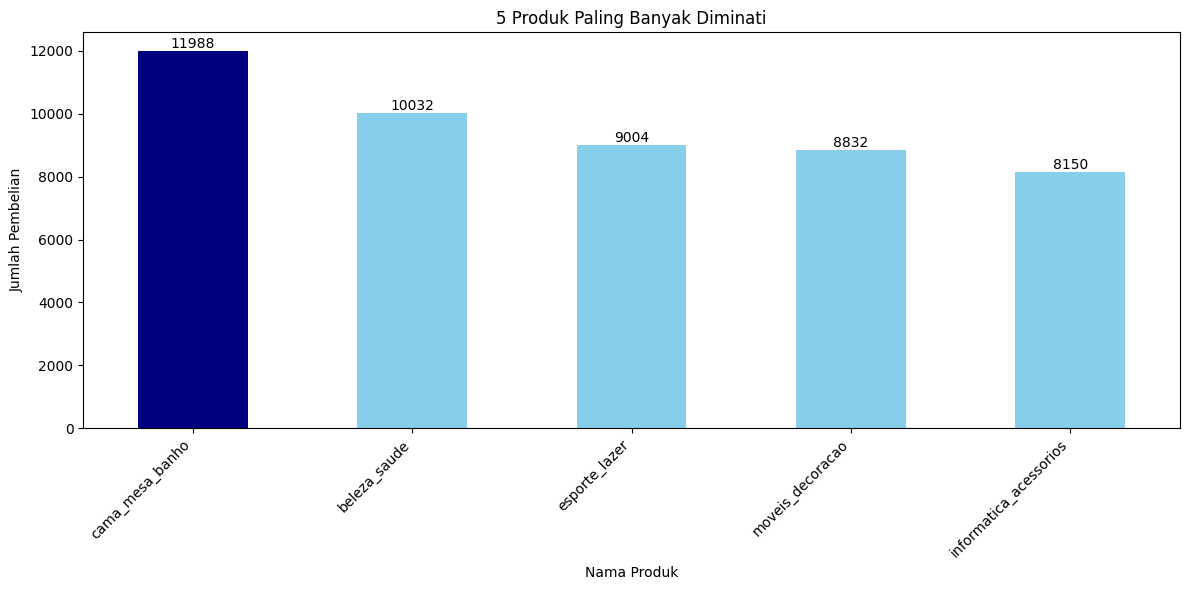

In [200]:
colors_top = ['navy' if prod == max_products.idxmax() else 'skyblue' for prod in max_products.index]
colors_bottom = ['grey' if prod == min_products.idxmin() else 'lightgrey' for prod in min_products.index]

# Membuat visualisasi untuk produk paling banyak diminati
plt.figure(figsize=(12, 6))

top_plot = max_products.plot(kind='bar', color=colors_top)
for bar in top_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')

plt.title('5 Produk Paling Banyak Diminati')
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

>*   Produk yang paling banyak diminati adalah cama_mesa_banho dengan jumlah 1198

In [201]:
# Menampilkan 5 produk paling sedikit diminati
min_products = all_data["product_category_name"].value_counts().tail(5).sort_values()

min_products_df = pd.DataFrame({
    'Nama Produk': min_products.index,
    'Total': min_products.values
})
min_products_df

,Nama Produk,Total
0,seguros_e_servicos,2
1,fashion_roupa_infanto_juvenil,8
2,pc_gamer,10
3,cds_dvds_musicais,14
4,portateis_cozinha_e_preparadores_de_alimentos,15


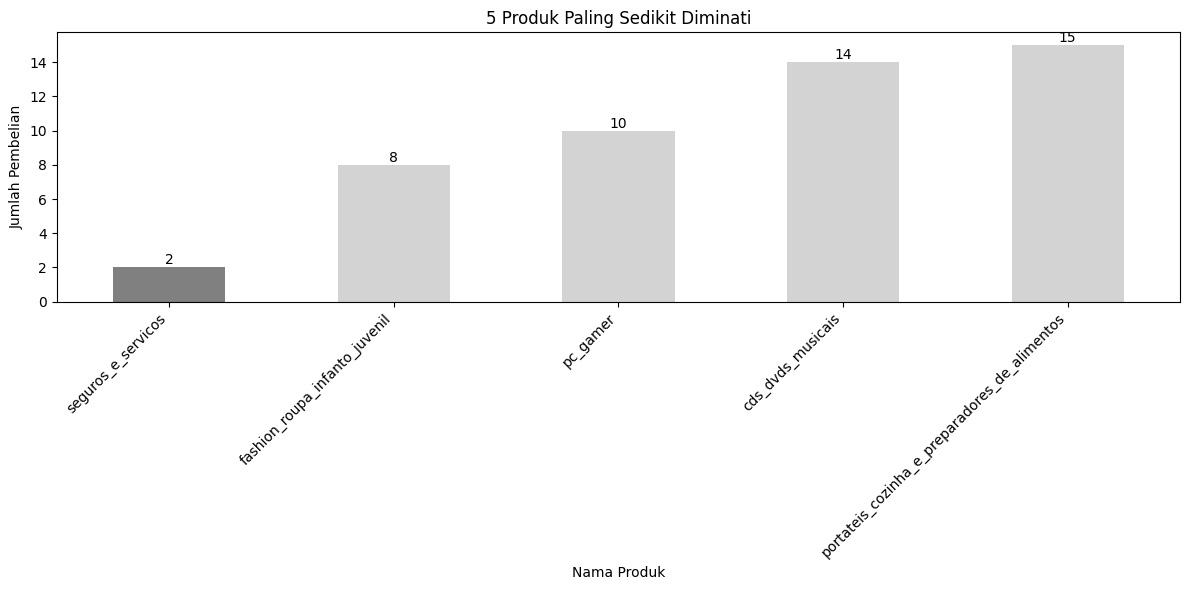

In [202]:
# Membuat visualisasi untuk produk paling sedikit diminati (diurutkan)
plt.figure(figsize=(12, 6))

bottom_plot = min_products.plot(kind='bar', color=colors_bottom)
for bar in bottom_plot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center', va='bottom')

plt.title('5 Produk Paling Sedikit Diminati')
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()




>*   Produk yang paling sedikit diminati adalah seguros_e_servicos dengan jumlah 2




### 3.2 Pertanyaan 2: Apa tipe pembayaran yang sering digunakan oleh customers?


In [203]:
# Mengambil tiga tipe pembayaran teratas
top_payment_types = all_data["payment_type"].value_counts().head(3)

top_payment_types_df = pd.DataFrame({
    'Tipe Pembayaran': top_payment_types.index,
    'Total': top_payment_types.values
})

top_payment_types_df

,Tipe Pembayaran,Total
0,credit_card,87258
1,boleto,23018
2,voucher,6332


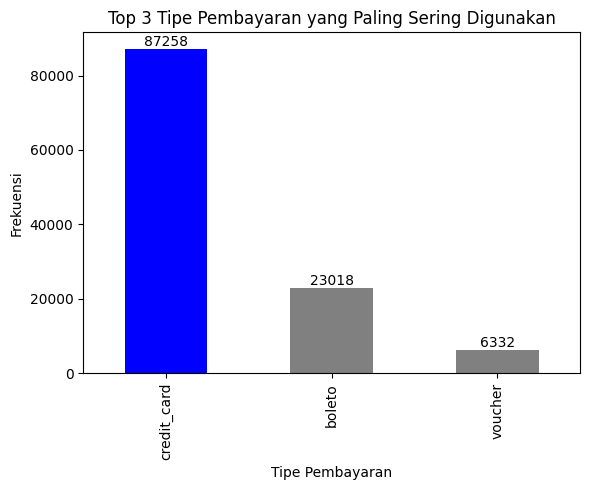

In [204]:
# Visualisasi tipe pembayaran yang sering digunakan oleh customers?
fig, ax = plt.subplots(figsize=(6, 5))
top_three = top_payment_types.plot(kind='bar', ax=ax, color=['blue', 'grey', 'grey'])

for bar in top_three.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
            f'{int(bar.get_height())}', ha='center', va='bottom')

ax.set_title('Top 3 Tipe Pembayaran yang Paling Sering Digunakan')
ax.set_xlabel('Tipe Pembayaran')
ax.set_ylabel('Frekuensi')
plt.tight_layout()
plt.show()



>Tipe pembayaran paling banyak digunakan adalah credit card dengan jumlah 87258 kali digunakan





### 3.3 Pertanyaan 3: Bagaimana perbandingan jumlah pesanan antara berbagai status-order? Apakah ada status-order yang memiliki jumlah pesanan yang lebih dominan daripada yang lain? Jika ada, bagaimana persentase dari pesanan dengan status yang lebih dominan dibandingkan dengan total pesanan yang memiliki status lainnya?

In [205]:
# Mengambil jumlah pesanan untuk setiap status order
order_status_counts = all_data["order_status"].value_counts()

order_status_counts_df = pd.DataFrame({
    'Status Order': order_status_counts.index,
    'Jumlah Pesanan': order_status_counts.values
})

order_status_counts_df

,Status Order,Jumlah Pesanan
0,delivered,115723
1,shipped,1255
2,canceled,570
3,invoiced,376
4,processing,376
5,unavailable,7
6,approved,3


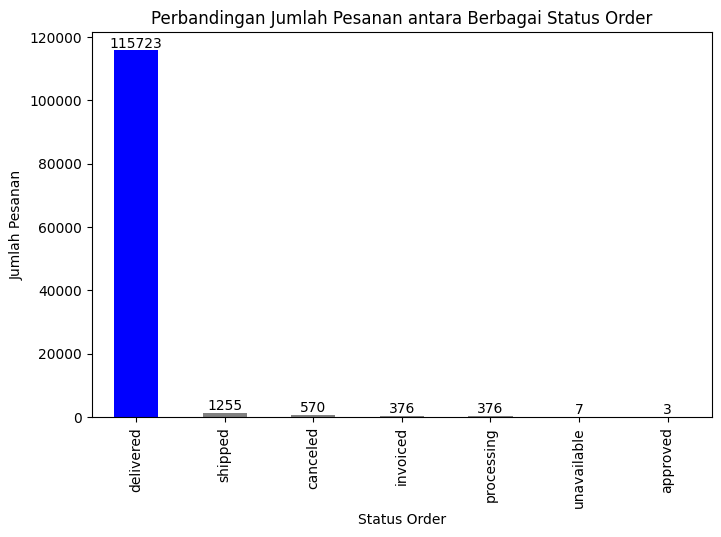

In [206]:
# Visualisasi perbandingan jumlah pesanan antara berbagai status order
fig, ax = plt.subplots(figsize=(8, 5))
bars = order_status_counts.plot(kind='bar', color=['blue' if status == order_status_counts.idxmax() else 'grey' for status in order_status_counts.index], ax=ax)

for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
            f'{int(bar.get_height())}', ha='center', va='bottom')

ax.set_title('Perbandingan Jumlah Pesanan antara Berbagai Status Order')
ax.set_xlabel('Status Order')
ax.set_ylabel('Jumlah Pesanan')

plt.show()

> * Perbandingan jumlah pesanan antara berbagai status-order yaitu:
    * Pesanan dengan status delivered: 115723
    * Pesanan dengan status shipped: 1255
    * Pesanan dengan status invoiced: 376
    * Pesanan dengan status processing: 376
    * Pesanan dengan status unavailable: 7
* Terdapat status order yang memiliki jumlah pesanan yang lebih dominan daripada yang lain yaitu status order "delivered"

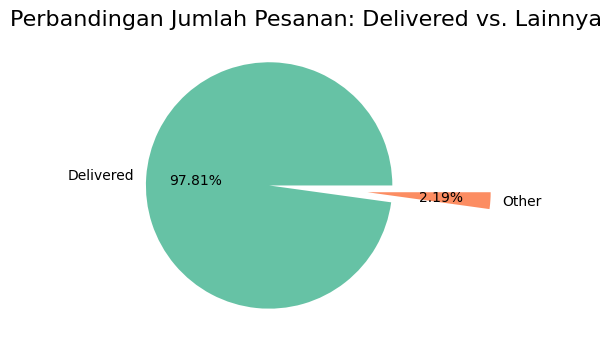

In [207]:
# Mengetahui persentase pesanan dengan status delivered dibandingkan dengan total pesanan yang memiliki status lainnya
# Menghitung jumlah pesanan dengan status "delivered"
delivered_count = all_data["order_status"].value_counts().get("delivered", 0)

# Menghitung jumlah total pesanan dengan semua status
total_orders = all_data["order_status"].count()

# Menghitung jumlah pesanan dengan status lainnya
other_statuses_count = total_orders - delivered_count

statuses = ['Delivered', 'Other']
counts = [delivered_count, other_statuses_count]

fig, ax = plt.subplots(figsize=(5, 4))
ax.pie(counts, labels=statuses, autopct='%1.2f%%', explode=[0.3, 0.5], colors=sns.color_palette('Set2'))
ax.set_title('Perbandingan Jumlah Pesanan: Delivered vs. Lainnya', loc='center', fontsize=16)

plt.show()

> Persentase dari pesanan yang berstatus lebih dominan dibandingkan dengan total pesanan berstatus lainnya yaitu 97,81%

### 3.4 Petanyaan 4: Apa saja kota dengan jumlah order berstatus "delivered" terbanyak?

In [208]:
#Mengetahui 5 kota dengan jumlah order berstatus delivered terbanyak
#Memfilter data yang hanya berstatus delivered
top_cities = delivered_orders["customer_city"].value_counts().head()

top_cities_df = pd.DataFrame({
    'City':top_cities.index,
    'Total': top_cities.values
})

top_cities_df

,City,Total
0,sao paulo,18299
1,rio de janeiro,8003
2,belo horizonte,3214
3,brasilia,2431
4,curitiba,1792


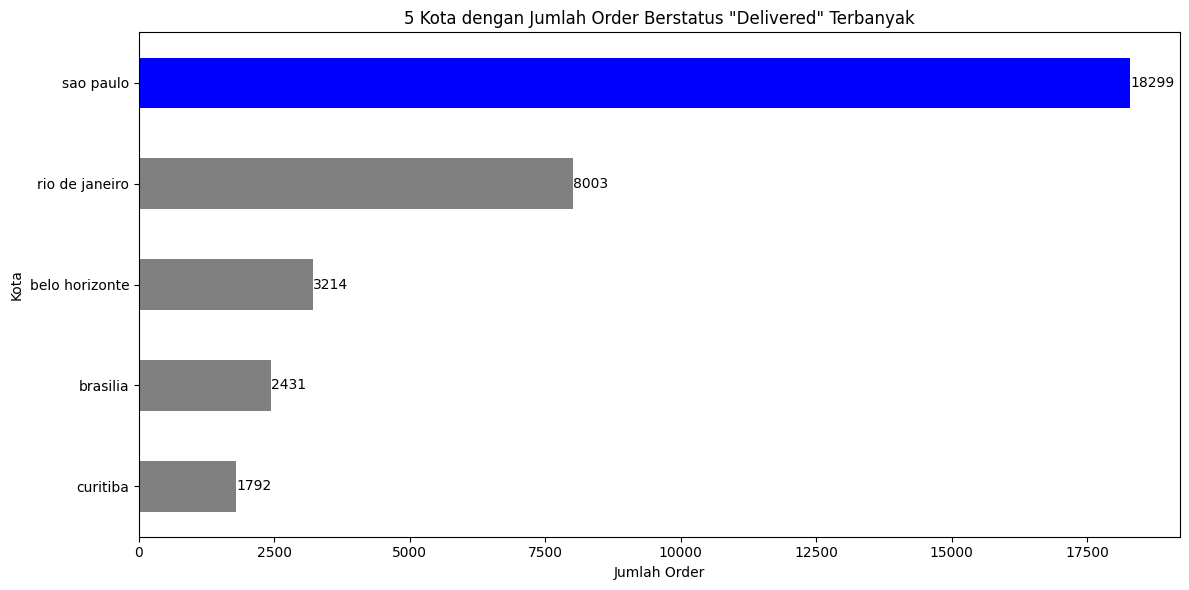

In [209]:
# Mengurutkan data berdasarkan jumlah order secara descending
top_cities = top_cities.sort_values(ascending=True)

plt.figure(figsize=(12, 6))

bars = top_cities.plot(kind='barh', color=['blue' if city == top_cities.idxmax() else 'grey' for city in top_cities.index])

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center')

plt.title('5 Kota dengan Jumlah Order Berstatus "Delivered" Terbanyak')
plt.xlabel('Jumlah Order')
plt.ylabel('Kota')

plt.tight_layout()
plt.show()



> *  Kota dengan jumlah order berstatus delivered terbanyak yaitu:
    * Sao paulo: dengan jumlah 18299
    * Rio De Janeiro: dengan jumlah 8003
    * Belo Horizonte: dengan jumlah 3214
    * Brasilia: dengan jumlah 2431
    * Curitiba: dengan jumlah 1792

## 4. Conclusion

1.   Conclution pertanyaan 1: Produk apa yang paling banyak & paling sedikit diminati oleh customers?
>  Berdasarkan Visualization & Explanatory Analysis di atas, dapat disimpulkan bahwa Produk yang paling banyak diminati adalah cama_mesa_banho dengan jumlah 1198. Sedangkan untuk produk yang paling sedikit diminati adalah seguros_e_servicos dengan jumlah 2
2.   Conclution pertanyaan 2: Apa tipe pembayaran yang sering digunakan oleh customers?
> Berdasarkan Visualization & Explanatory Analysis di atas, dapat disimpulkan bahwa tipe pembayaran yang paling banyak digunakan adalah tipe pembayaran credit card dengan jumlah 87258 kali digunakan

3.   Conclution pertanyaan 3: Bagaimana perbandingan jumlah pesanan antara berbagai status-order? Apakah ada status-order yang memiliki jumlah pesanan yang lebih dominan daripada yang lain? Jika ada, bagaimana persentase dari pesanan dengan status yang lebih dominan dibandingkan dengan total pesanan yang memiliki status lainnya?
>  Berdasarkan Visualization & Explanatory Analysis di atas, dapat disimpulkan bahwa perbandingan jumlah pesanan antara berbagai status-order yaitu:
    * Pesanan dengan status delivered: 115723
    * Pesanan dengan status shipped: 1255
    * Pesanan dengan status invoiced: 376
    * Pesanan dengan status processing: 376
    * Pesanan dengan status unavailable: 7
  Kemudian, terdapat status order yang memiliki jumlah pesanan yang lebih dominan daripada yang lain yaitu status order "delivered" dengan persentase mencapai 97,81%.


4.   Conclution pertanyaan 4: Apa saja kota dengan jumlah order berstatus "delivered" terbanyak?
>  Berdasarkan Visualization & Explanatory Analysis di atas, dapat disimpulkan bahwa kota dengan jumlah order berstatus delivered terbanyak yaitu:
    * Sao paulo: dengan jumlah 18299
    * Rio De Janeiro: dengan jumlah 8003
    * Belo Horizonte: dengan jumlah 3214
    * Brasilia: dengan jumlah 2431
    * Curitiba: dengan jumlah 1792



